## Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
hny_prdt=pd.read_csv("honeyproduction.csv")
hny_prdt.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


## Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
hny_prdt.sample(2)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
125,WA,52000.0,54,2808000.0,1151000.0,0.58,1629000.0,2000
23,NV,10000.0,46,460000.0,175000.0,1.65,759000.0,1998


In [4]:
hny_prdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [5]:
hny_prdt.shape

(626, 8)

In [6]:
hny_prdt.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

##  Display the percentage distribution of the data in each year using the pie chart.

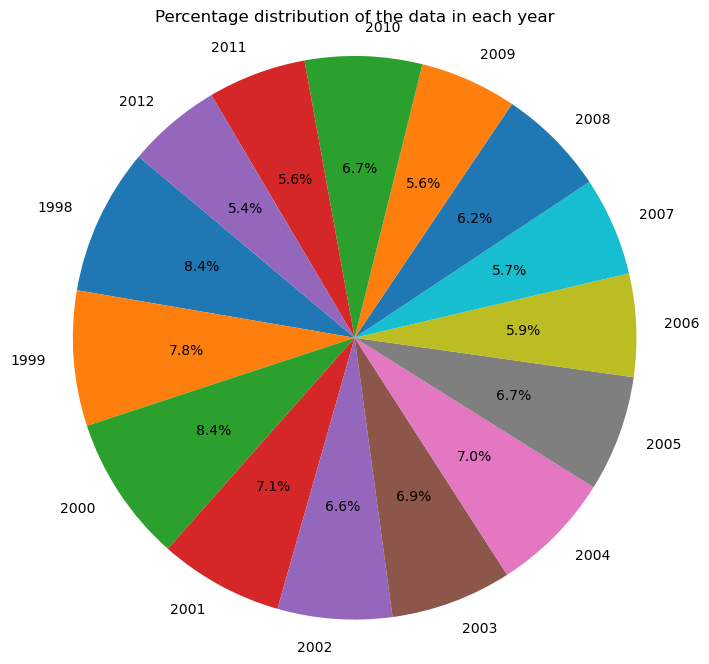

In [7]:
total_production=hny_prdt.groupby('year')['totalprod'].sum()
plt.figure(figsize=(8,8))
plt.pie(total_production,labels=total_production.index,autopct='%1.1f%%',startangle=140)
plt.title("Percentage distribution of the data in each year")
plt.axis('equal')
plt.show()

## Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

<Figure size 1000x2000 with 0 Axes>

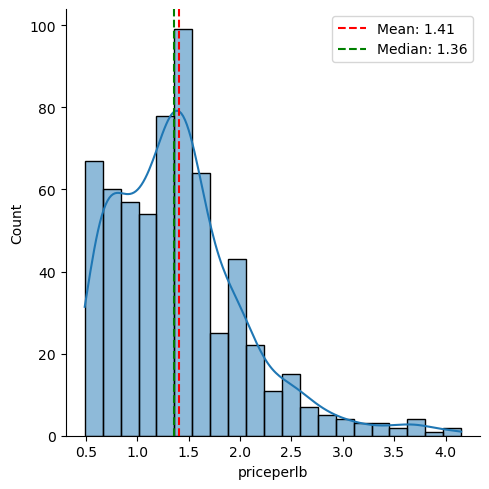

In [8]:
plt.figure(figsize=(10, 20))
sns.displot(data=hny_prdt, x='priceperlb', kde=True)
mean = round(hny_prdt['priceperlb'].mean(), 2)
median = hny_prdt['priceperlb'].median()
plt.axvline(x=mean, color='r', linestyle='--', label=f"Mean: {mean}")
plt.axvline(x=median, color='g', linestyle='--', label=f"Median: {median}")
plt.legend()
plt.show()


- In this summary data appears to have a right skewed distribution with the spread of value.
- The average or mean of these distribution is about 1.41 this means on an average price per pound based on expanded sales which tend to be slightly higher than the middle value.
- The median,which is the middle value of this distribution is approximately 1.36. Where mean is bit higher than the median as if the data has a tail stretching towards the higher values towards right.

## Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

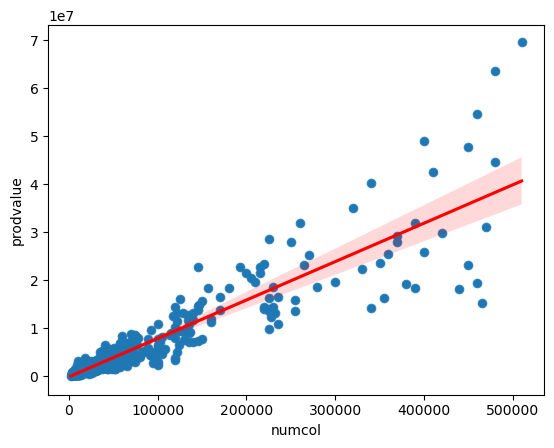

In [9]:
sns.scatterplot(x=hny_prdt['numcol'],y=hny_prdt['prodvalue'])
sns.regplot(x=hny_prdt['numcol'], y=hny_prdt['prodvalue'], line_kws={'color': 'red'})
plt.show()

In this graphical representation of two variables we can intrepet that:
- We can observe the point tends to move from left to right which suggest a positive correlation between `prodvalue` and `numcol`.
- Which says that as the number of honey producing colonies increases the value of production also increases.
- The number of honey producing colonies between 100000 are having strong relationship between prodvalue.

## Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

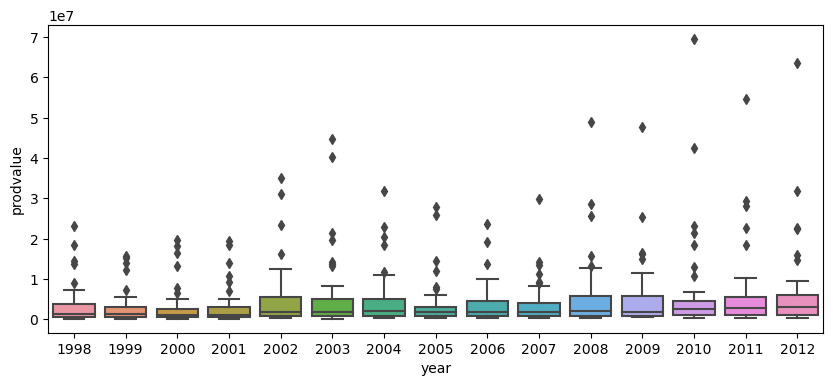

In [10]:
plt.figure(figsize=(10,4))
sns.boxplot(data=hny_prdt,x='year',y='prodvalue')
plt.show()

Value of production Inference:
- In each year the value of production varies.
- The maximum production value was in the year 2008.
- The production value keeps on changing in every year.
- In the year 2010 the outlier of production value is high i.e.7*10^7.

In [11]:
hny_prdt.groupby('year')['prodvalue'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1998,43.0,3.397465e+06,5.081114e+06,179000.0,645500.0,1361000.0,3746500.0,23157000.0
1999,43.0,2.875744e+06,4.068182e+06,186000.0,612500.0,1277000.0,2956000.0,15797000.0
2000,43.0,3.059721e+06,4.828234e+06,173000.0,580500.0,1035000.0,2559500.0,19665000.0
2001,44.0,3.006409e+06,4.581726e+06,174000.0,602000.0,1138500.0,2968750.0,19361000.0
2002,44.0,5.165955e+06,7.788900e+06,259000.0,731750.0,1836000.0,5613000.0,35040000.0
2003,44.0,5.729068e+06,9.591644e+06,162000.0,754500.0,1906500.0,5086000.0,44702000.0
2004,41.0,4.812366e+06,6.969411e+06,278000.0,716000.0,1984000.0,5052000.0,31941000.0
2005,41.0,3.921780e+06,6.091451e+06,345000.0,858000.0,1769000.0,2981000.0,27946000.0
2006,41.0,3.851805e+06,5.090348e+06,369000.0,785000.0,1826000.0,4554000.0,23569000.0


## Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol','yield percol', 'total prod', 'prodvalue','year')

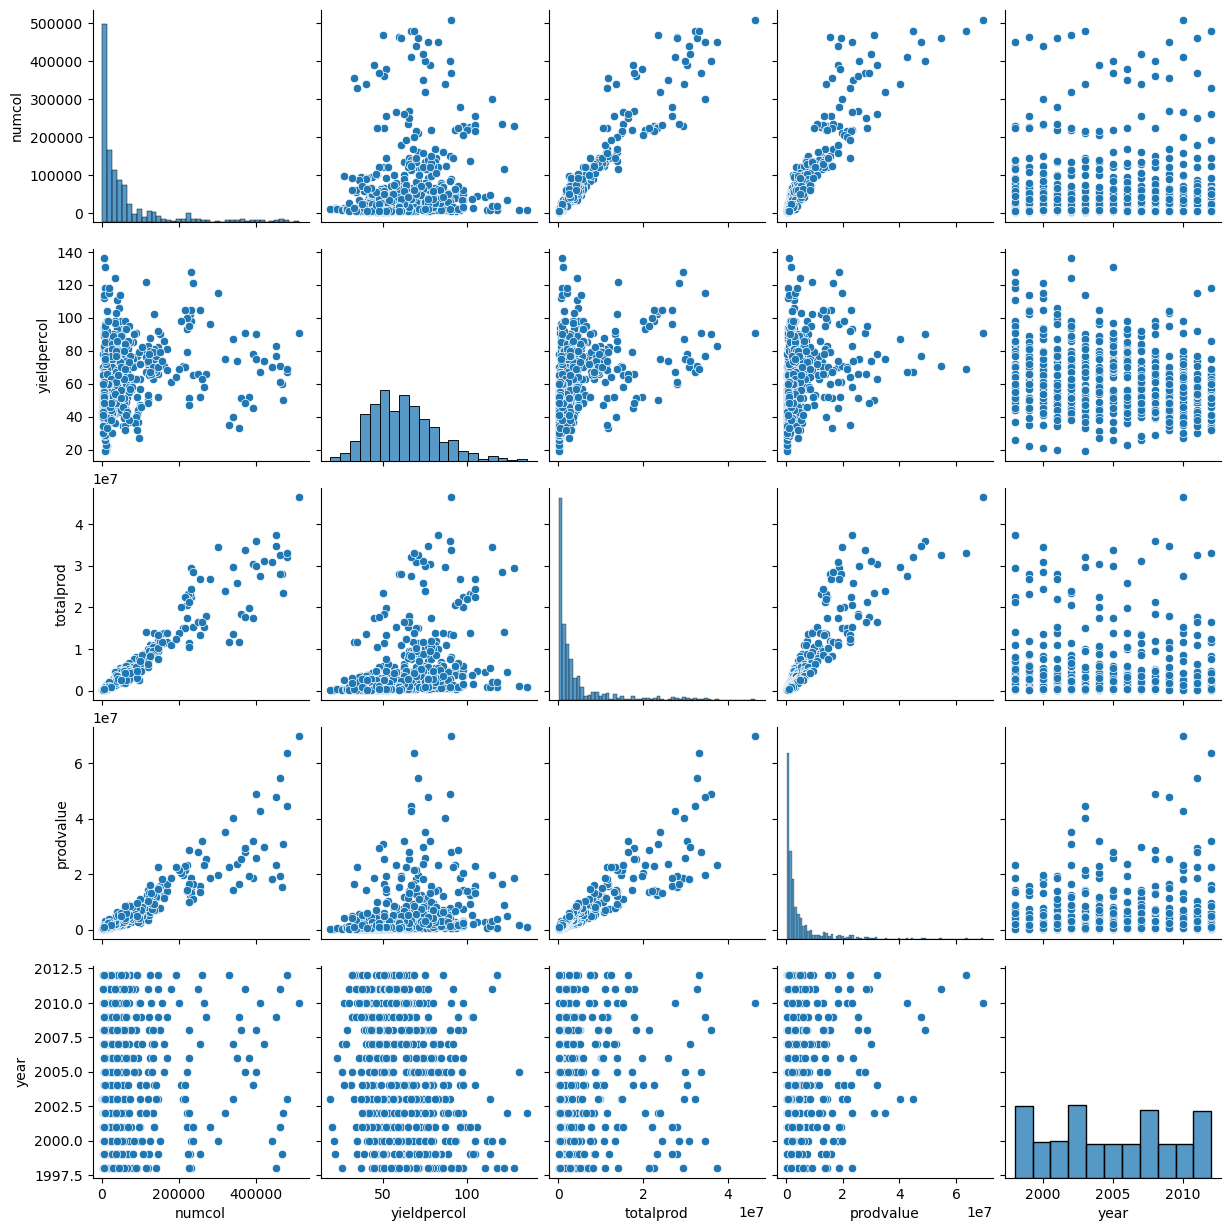

In [12]:
sns.pairplot(hny_prdt,vars=['numcol','yieldpercol','totalprod','prodvalue','year'])

**Inference:**

**Histogram of Number of honey producing colonies.**

- The histogram distribution of "numcol" reveals a right-skewed pattern, indicating a substantial number of honey-producing colonies.
- Notably, there is a concentration of observations within the range of 0 to 100,000, suggesting a significant portion of honey-producing colonies    falls within this interval.

**Histogram of Honey yield per colony. (Unit is pounds).**

- "The distribution of 'yieldpercol' is slightly right-skewed, yet it closely approximates a normal distribution."
- "Approximately 90% of the data is concentrated within the range of 20 to 10.
  
**Histogram of Total production (numcol x yieldpercol) (Unit is pound).**
    
- The histogram distribution of 'totalprod' is positively right-skewed, with the concentration of observations primarily within therange of 0 - 1.

**Histogram of Product Value.**

- Approximately 70-80 percent of the distribution falls within the range of 0 to 1 to the power of 10^7. 
- However, there are additional values extending up to 7^7.
- This distribution exhibits right skewness, characterized by a long and thick tail on the positive side.

**Histogram of year.**

- "In this distribution, we can interpret that the majority of the data falls within the average range of 40 to 50 for each year."

**Scatterplot of Number of Colony and Yield per colony.**

- Upon examining the scatter plot, it is apparent that there is no strong correlation between the number of colonies and yield per colony.
-  Additionally, within the range of 0 to 100,000 colonies, the majority of yield per colony values are distributed between 20 and 140.

**Scatterplot of Number of Colony and Total production.**

- In this scatter plot distribution, a positive correlation is evident. As the number of colonies increases, the total production also shows an increase.

**Scatterplot of Number of Colony and Product Value.**

- This distribution exhibits a positive correlation, indicating that as the product value increases, the number of colonies producing also increases.

**Scatterplot of Number of Colony and Year.**

- There is no correlation between the number of colonies and the year.

**Scatterplot of Yield per colony and Total production.**

- While this distribution demonstrates a positive correlation, the relationship between the number of colonies and yield per colony is not strongly correlated.
- Although there is an increase in yield per colony, the corresponding rise in total production is not substantial.
- However, specific instances exist where the distribution shows a notable increase in total production associated with higher yield per colony values.

**Scatterplot of Yield per colony and Product value.**

- While there is a positive correlation between Product value and yield per colony, the increase in yield per colony does not consistently translate to a significant rise in Product value. However, specific instances show notable increases in Product value associated with higher yield per colony values.

**Scatterplot of Yield per colony and Year.**

- There is a negative correlation between Yield per colony and Year. As the years progress, the yield per colony decreases.
- A noticeable difference in yield per colony can be observed from the year 1998 to 2012.

**Scatterplot of Total production and Product value.**

- There is a positive correlation observed; when the product value increases, the total production also shows an increase.

**Scatterplot of Total production and year**

- Here total production and year is having slight negative correlation as we can see as year passes the total porduction is decreasing.


## Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol',''total prod', 'stocks', 'price per lb', 'prodvalue')

In [13]:
hny_prdt.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

<Axes: >

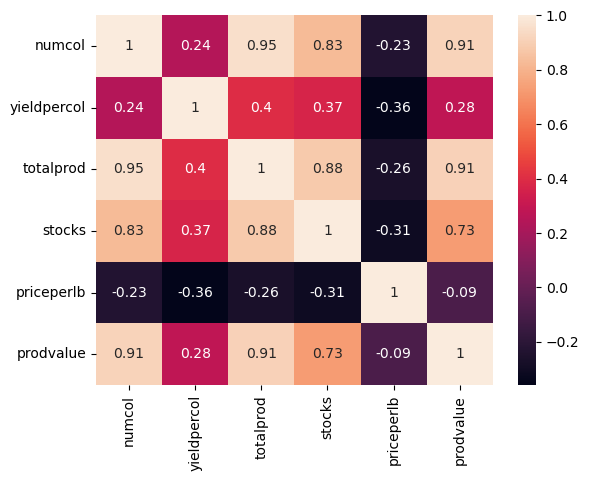

In [14]:
selected_data=['numcol','yieldpercol','totalprod','stocks','priceperlb','prodvalue']
data=hny_prdt[selected_data]
corr=data.corr()
sns.heatmap(corr,annot=True)

**Inference:**

-  The number of colonies producing honey demonstrates a strong positive correlation with total production and product value, as well as a strong negative correlation with price per lb.
- Yield per colony does not exhibit a strong correlation with any factors, except for a negative correlation with yield per colony itself.
- Total production shows a positive correlation with stocks and product value,while it has a negative correlation with price per lb.
- Stocks are negatively correlated with price per lb.er lb.